In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Frequency Detection

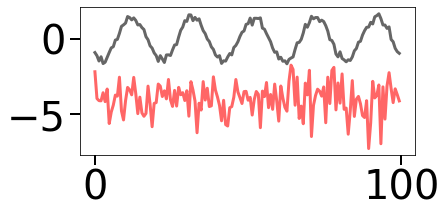

In [3]:
from data_fns import frequency_detection
n_samples, fs, signal_duration, k, a = 5000, 1500, 0.1, 5, 0.99
X, y = frequency_detection(n_samples, fs, k, signal_duration, a, random_state=20)
freq = int(k / signal_duration)
N = int(fs * signal_duration)
t = np.arange(N) / fs * 1000

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(211)
plt.plot(t, X[y == 1][0], 'k-', lw=3, alpha=0.6, label='$\omega_1=$%d Hz' % freq)
plt.plot(t, X[y == -1][0] - 3.9, 'r-', lw=3, alpha=0.6,label=r'white noise')
# plt.legend(loc='lower right', fontsize=35)
# plt.xlabel('time (ms)', fontsize=20)
# plt.ylabel('Amplitude', fontsize=20)
# plt.ylim([-4.5, 4.5])
# ax.set_yticks([-1.5, 0, 1.5])
# ax.set_xticks(np.arange(0, 125, 25))
# plt.xlim([-5, 105])
ax.tick_params(direction='out', length=10, width=2, colors='k',
           grid_color='k', grid_alpha=0.5, labelsize=40)
plt.savefig('results/paper_figs/figure_4/freq_detection_task.pdf')

## plot freq detection

halteres, 0.0000
classical, 0.1939
mistuned, 16.7030


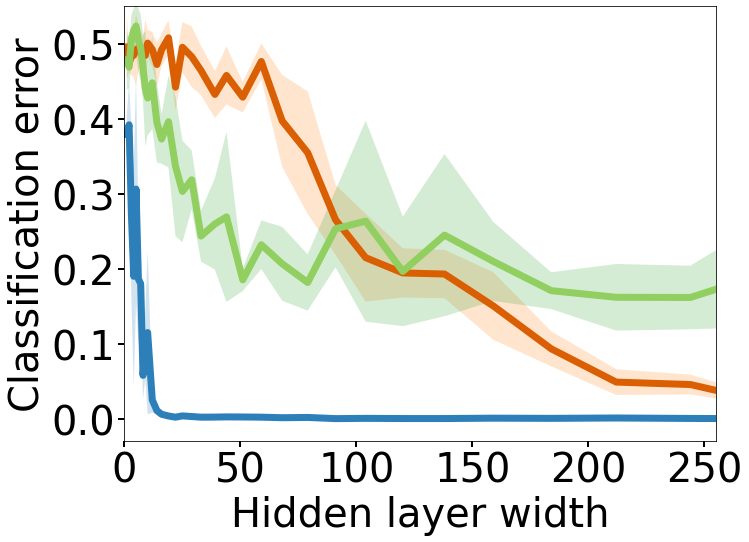

In [11]:
n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
models = ['halteres', 'classical', 'mistuned']
labels = {'halteres': 'sensilla-inspired', 'classical': 'classical', 'mistuned': 'mistuned'} 

# load with good params
with open('results/freq_detection/freq_clf.pickle', 'rb') as handle:
    results = pickle.load(handle) 

# load results with bad params
with open('results/freq_detection/freq_detection_mistuned.pickle', 'rb') as handle:
    results_mistuned = pickle.load(handle)
    
results['mistuned'] = results_mistuned['halteres']

colors = {'halteres': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}

fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=7, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_test_err[-1] * 100))
ax.set_xlim([0, 255])
plt.yticks(np.arange(0, 0.6, 0.1))
plt.ylim([-0.03, 0.55])
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xticks(np.arange(0, 255, 50))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
plt.savefig('results/paper_figs/figure_4/freq_clf_results.pdf')

## Frequency XOR 

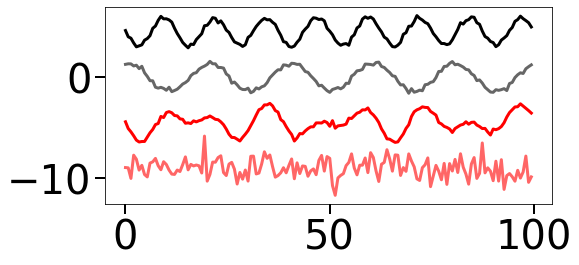

In [5]:
from data_fns import frequency_XOR

nPoints, fs, sig_dur = 5000, 1500, 0.1
k1, k2 = 5, 8
a = 0.99
freq = [int(k1/ sig_dur), int(k2  / sig_dur)]
X, y = frequency_XOR(nPoints, fs, k1, k2, sig_dur, a, random_state=20, shuffle=False)

# plot
snr = a ** 2 / (1 - a ** 2)
N = int(fs * sig_dur)
t = np.arange(N) / fs * 1000
nPoints_quarter = int(nPoints / 4)

# fig = plt.figure(figsize=(10.6, 8))
# # plt.suptitle('XOR data: SNR=%0.2f' % snr, fontsize=16)
# ax = fig.add_subplot(211)
# plt.plot(t, X[0], 'k-', lw=6, alpha=0.6, label='$\omega_1=$%d Hz' % freq[0])
# plt.plot(t, X[1250], 'k', lw=6, label=r'$\omega_2=$%d Hz' % freq[1])
# # plt.legend(loc='lower right', fontsize=30)
# # plt.xlabel('time (ms)', fontsize=20)
# # plt.ylabel('Amplitude', fontsize=20)
# plt.ylim([-2, 2])
# ax.set_yticks([-1.5, 0, 1.5])
# ax.tick_params(direction='out', length=10, width=2, colors='k',
#            grid_color='k', grid_alpha=0.5, labelsize=40)


# ax = fig.add_subplot(212)
# plt.plot(t, X[2501], 'r', lw=6, label=r'mixed $%d$ & $%d$ Hz' % (freq[0], freq[1]))
# plt.plot(t, X[-1], 'r-', lw=3, alpha=0.6, label='white noise')
# # plt.legend(loc='lower right', fontsize=30)
# # plt.xlabel('time (ms)', fontsize=20)
# # plt.ylabel('Amplitude', fontsize=20)
# plt.ylim([-2, 2])
# ax.set_yticks([-1.5, 0, 1.5])
# ax.tick_params(direction='out', length=10, width=2, colors='k',
#            grid_color='k', grid_alpha=0.5, labelsize=40)
# plt.tight_layout()
# plt.savefig('results/paper_figs/figure_4/freq_XOR_task.pdf')

# vertical stack
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)
plt.plot(t, X[0], 'k-', lw=3, alpha=0.6, label='$\omega_1=$%d Hz' % freq[0])
plt.plot(t, X[1250] + 4.5, 'k', lw=3, label=r'$\omega_2=$%d Hz' % freq[1])
plt.plot(t, X[2501] - 4.5, 'r', lw=3, label=r'mixed $%d$ & $%d$ Hz' % (freq[0], freq[1]))
plt.plot(t, X[-1] - 9, 'r-', lw=3, alpha=0.6, label='white noise')
# plt.legend(loc='lower right', fontsize=30)
# plt.xlabel('time (ms)', fontsize=20)
# plt.ylabel('Amplitude', fontsize=20)
# plt.ylim([-2, 2])
# ax.set_yticks([-1.5, 0, 1.5])
ax.tick_params(direction='out', length=10, width=2, colors='k',
           grid_color='k', grid_alpha=0.5, labelsize=40)
plt.savefig('results/paper_figs/figure_4/freq_XOR_task.pdf')

## Plot experimental results

In [13]:
n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
models = ['halteres', 'mistuned', 'classical']
labels = {'halteres': 'sensilla-inspired', 'classical': 'classical', 'mistuned': 'mistuned'} 

# load with good params
with open('results/freq_XOR/freq_XOR.pickle', 'rb') as handle:
    results = pickle.load(handle) 
    
# load results with mistuned params
with open('results/freq_XOR/freq_XOR_mistuned.pickle', 'rb') as handle:
    results_mistuned = pickle.load(handle)

results['mistuned'] = results_mistuned['halteres']

halteres, 0.0400
mistuned, 35.5200
classical, 0.1333


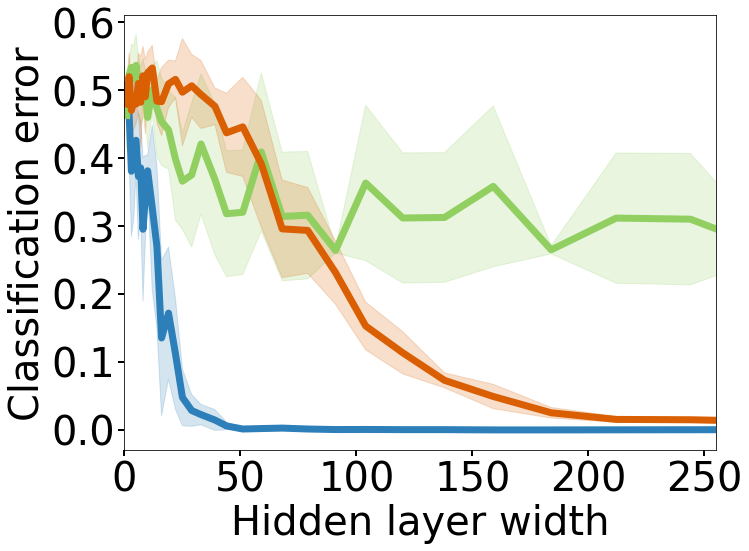

In [14]:
colors = {'halteres': '#2c7fb8', 'classical': '#d95f02', 'mistuned': '#91cf60'}
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
for m in models:
    avg_test_err = results[m]['avg_test_err']
    std_test_err = results[m]['std_test_err']
    plt.plot(n_features, avg_test_err, label=labels[m], lw=7, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_test_err, avg_test_err + std_test_err, alpha=0.2, color=colors[m])
    print('%s, %0.4f' % (m, avg_test_err[-1] * 100))
    
# plot results when mistuned
    
ax.set_xlim([0, 255])
plt.yticks(np.arange(0, 0.7, 0.1))
plt.ylim([-0.03, 0.61])
# ax.set_yscale('log')
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xticks(np.arange(0, 255, 50))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
plt.savefig('results/paper_figs/figure_4/freq_XOR_results.pdf')

In [35]:
list(zip(n_features, results['halteres']['avg_test_err']))

[(1, 0.46266666666666667),
 (2, 0.5229333333333334),
 (3, 0.5334666666666668),
 (4, 0.5170666666666667),
 (5, 0.5365333333333334),
 (6, 0.5105333333333333),
 (7, 0.4914666666666667),
 (8, 0.5024),
 (9, 0.4973333333333333),
 (10, 0.45986666666666665),
 (12, 0.5005333333333333),
 (14, 0.47319999999999995),
 (16, 0.45373333333333327),
 (19, 0.44160000000000005),
 (22, 0.39866666666666667),
 (25, 0.36600000000000005),
 (29, 0.37533333333333335),
 (33, 0.4208),
 (39, 0.36866666666666664),
 (44, 0.3181333333333333),
 (51, 0.32026666666666664),
 (59, 0.40906666666666675),
 (68, 0.3141333333333334),
 (79, 0.316),
 (91, 0.26413333333333333),
 (104, 0.3633333333333334),
 (120, 0.3118666666666667),
 (138, 0.3126666666666667),
 (159, 0.35840000000000005),
 (184, 0.2650666666666667),
 (212, 0.31173333333333336),
 (244, 0.31013333333333337),
 (281, 0.26213333333333333),
 (323, 0.31053333333333333),
 (372, 0.36040000000000005),
 (429, 0.2648),
 (494, 0.3589333333333333),
 (568, 0.26253333333333334),
